# Sistemi odlučivanja u medicini-projekat
Milica Vukašinović 2020/0093  
Marija Brkić 2020/0200


### Prva tačka

Cilj ovog projekta je da se napravi klasifikator kojim će se predvideti trenutni metod kontracepcije(1-ne koriste je, 2-dugotrajni metod, 3-kratkotrajni metod) žena na osnovu njihovih demografskih i socio-ekonomskih karakteristika. Podaci iz baze su dobijeni nad udatim ženama, koje ili nisu bile trudne, ili nisu znale da su trudne za vreme intervjuisanja. Podaci su prikupljeni Nacionalnim indonezijskim istraživanjem o zaštiti kontraceptivima iz 1987. godine.

Atributi u korišćenoj bazi podataka su sledeći:

   1. Broj godina žene                        (numerički)

   2. Obrazovanje žene                        (categorijski)     1=nisko, 2, 3, 4=visoko

   3. Obrazovanje muškarca                    (categorijski)     1=nisko, 2, 3, 4=visoko

   4. Broj dece                               (numerički)

   5. Religija žene                           (binarni)          0=nije Islam, 1=Islam

   6. Da li je žena trenutno zaposlena        (binarni)          0=da, 1=ne

   7. Zanimanje muškarca                      (categorijski)     1, 2, 3, 4

   8. Indeks životnog standarda               (categorijsko)     1=nizak, 2, 3, 4=visok

   9. Izloženost medijima                     (binarni)          0=dobra, 1=loša

   10. Korišćena metoda kontracepcije         (atribut klase)    1=ne koristi, 2=drgotrejno, 3=kratkotrajno

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('12_contraceptive_method_dataset.csv')
data.head()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [169]:

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1473 non-null   int64
 1   Wife's education              1473 non-null   int64
 2   Husband's education           1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife's religion               1473 non-null   int64
 5   Wife's now working?           1473 non-null   int64
 6   Husband's occupation          1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


Prethodno su priložene informacije o bazi podataka, gde zaključujemo da nema $NaN$ vrednosti, i da su svi podaci celobrojnog tipa.

In [170]:
data.describe()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


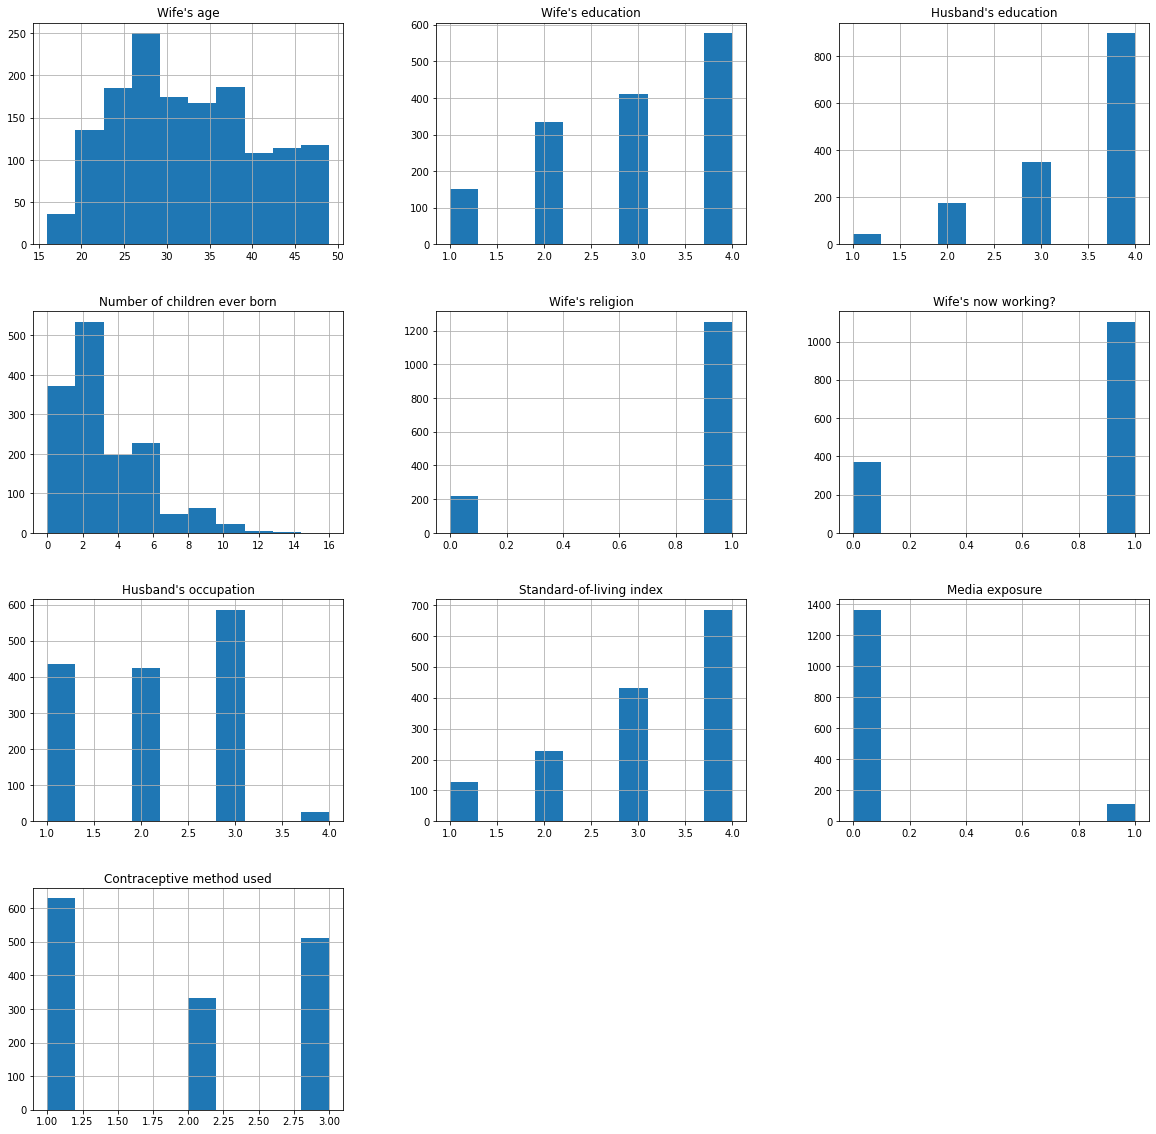

In [171]:
data.hist(bins=10, figsize=(20,20), )
plt.show()


Na prethodnim graficima su dati histogrami svakog atributa pojedinačno. Za početak možemo primetiti da su sve vrednosti diskretne, naročito iz razloga što su sve sem broja godina žena i broja dece kategorijski ili binarni atributi, koji su kodovani na odgovarajući način. Takođe, možemo primetiti da ne postoje vrednosti koje izlaze iz očekivanih okvira, što bi jedino i moglo da se desi u slučaju broja godina ispitanika, gde vidimo da svi ispitanici imaju između 15 i 50 godina, gde se ništa ne bi moglo proglasiti $outlier$-om, što važi i za broj dece. Ostali atributi su binarni ili kategorijski, pa svakako nema potrebe za otklanjanjem bilo kakvih podataka.


In [172]:
np.unique(data['Contraceptive method used'], return_counts=True)


(array([1, 2, 3], dtype=int64), array([629, 333, 511], dtype=int64))

Na osnovu prethodnog proračuna se vidi da nijedna klasa nema zastupljenost manju od 3-5%, samim tim nema potrebe za menjanjem podele na klase.

### Druga tačka
U narednom delu, za početak je potrebno ispitati korelaciju između obeležja. To je odrađeno da dva načina:  
Prvi način ispitivanja korelacije je $Pearson$-ov koeficijent. On se računa na sledeći način: 
$$ \rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X\sigma_Y}, $$ 
gde je $ \rho_{X, Y}$ $Pearson$-ov koeficijent, $cov(X, Y)$ je kovarijaciona matrica između dva obeležja, dok su $\sigma_X$ i $\sigma_Y$ standardne devijacije pojedinačnih obeležja. $Pearson$-ov koeficijent govori o linearnoj vezi među obeležjima. Sledećim delom koda je generisana tabela kojom se prikazuju $Pearson$-ovi koeficijenti među svim obeležjima.

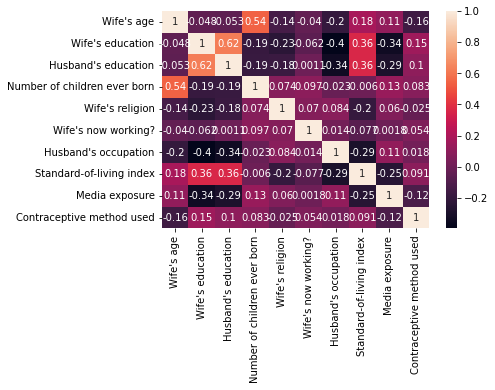

In [173]:
import seaborn as sns
pearson_koef = data.corr(method='pearson')
plt.figure()
plt.title('Pearson-ovi koeficijenti')
sns.heatmap(pearson_koef,annot=True)
plt.show()

Drugi način ispitivanja korelacije je $Spearman$-ov koeficijent. Formula po kojoj je on računat je sledeća:
$$ r_s = \rho_{rg_Xrg_Y} = \frac{cov(rg_X,rg_Y)}{\sigma_{rg_X}\sigma_{rg_Y}},$$
gde je $r_s = \rho_{rg_Xrg_Y}$ $Spearman$-ov koeficijent, $cov(rg_X,rg_Y)$ je kovarijaciona matrica među obeležjima koja su na neki način rangira, a $\sigma_{rg_X}$ i $\sigma_{rg_Y}$ su standardne devijacije na isti način rangiranih obeležja. Sledećim kodom je generisana tabela na kojoj su prikazani $Spearman$-ovi koeficijenti svih obeležja. $Spearman$-ov koeficijent govori o monotonoj zavisnosti među obeležjima. 

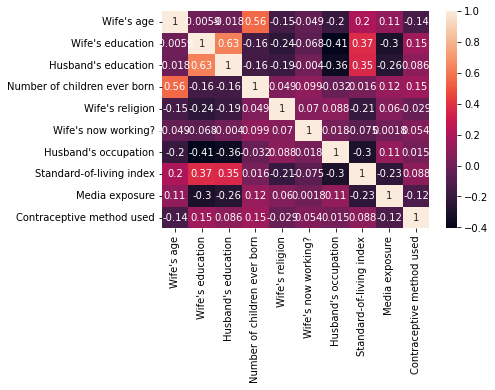

In [174]:
spearman_koef = data.corr(method='spearman')
plt.figure()
plt.title('Spearman-ovi koeficijenti')
sns.heatmap(spearman_koef, annot=True)
plt.show()

Na prethodna dva grafika je prikazano ispitivanje korelacije među obeležjima na dva načina, međutim, kako je potrebno da korelacija bude procenjena samo na jedan način, zaključak je da je za ovu bazu podataka bolja procena na osnovu $Spearman$-ovog koeficijenta. Naime, kako $Pearson$-ov koeficijent daje informaciju o linearnoj zavisnosti među obeležjima, a $Spearman$-ov koeficijent govori o monotonoj zavisnoti, sudeći po našim obeležjima koja su najčešće na neki način kategorisana, više bi imalo smisla ispitivati njihovu monotonu zavisnost, nego linearno. Iz tog razloga će kao parametar koji govori o korelaciji među obeležjima biti korišćen $Spearman$-ov koeficijent.  
Sada na osnovu dobijenih vrednosti možemo diskutovati o tome, kako je koje obeležje korelisano sa klasom:  
vidimo da broj godina žene, njena religija i izloženost medijima opadaju sa porastom indeksa klase, što svakako jeste nešto što bi bilo očekivano iz sociološkog gledišta. Ostala obeležja rastu sa porastom indeksa klase, što se takođe, uglavnom može objasniti kao sociološka pojava.

U narednom delu je prikazana jedna od metoda selekcija obeležja, Informaciona dobit(Information gain).  
On se računa na sledeći način:
$$\text{Info}(D) = -\sum_{i=1}^{n}p_ilog_2(p_i) $$  
$$\text{Info}(D/A) = \sum_{j=1}^{m}\frac{|D_j|}{|D|}\text{Info}(D_j)$$  
$$IG = \text{Info}(D) - \text{Info}(D/A),$$
gde je $\text{Info}(D)$ mera entropije klase, $\text{Info}(D/A)$ uslovna mera entropije klase, $\text{Info}(D_j)$ mera entropije pojedinačnih atributa, a $IG$ je Information Gain, koji se računa za svaki atribut pojedinačno, i što je on veći to je veća informacija koju nam taj atribut daje o klasi. Idealno bi bilo da klasa bude što neuređenija, to jest da $\text{Info}(D)$ bude što veći, a da pojedinačni atributi daju što veću informaciju o klasi, to jest da $\text{Info}(D/A)$ bude što manje. Sledećim delom koda je vršen ovaj proračun, i dati su $IG$ svakog atributa nesortirani i sortirani.


In [175]:
def racunajInfoD(kolona):
    vr = np.unique(kolona)
    infoD = 0
    for i in vr:
        p = sum(kolona == i)/len(kolona)
        infoD -= p*np.log2(p)
    return infoD

klasa = data.iloc[:,-1]
infoD = racunajInfoD(klasa)
print('Info(D) = ' + str(infoD))

Info(D) = 1.5390345832497476


In [176]:
IG = np.zeros((data.shape[1]-1, 2))

for i in range(data.shape[1]-1):
    kol = data.iloc[:, i]
    f = np.unique(kol)
    infoDA = 0
    for j in f:
        pom = klasa[kol == j]
        
        infoDj = racunajInfoD(pom)
        Dj = sum(kol == j)
        D = len(kol)
        
        infoDA += Dj*infoDj/D
    IG[i, 0] = i+1
    IG[i, 1] = infoD - infoDA
    
    print('IG' + str(i+1) + ' = ' + str(infoD - infoDA))
    print('------')

IGsorted = IG[IG[:, 1].argsort()]
print('Sortirano IG = \n' + str(IGsorted))

IG1 = 0.08435769583110542
------
IG2 = 0.07090633894894571
------
IG3 = 0.040138599229383676
------
IG4 = 0.12280897102964117
------
IG5 = 0.00982050143438462
------
IG6 = 0.002582332379721386
------
IG7 = 0.030474214560266333
------
IG8 = 0.032511460053806784
------
IG9 = 0.015786455595619753
------
Sortirano IG = 
[[6.00000000e+00 2.58233238e-03]
 [5.00000000e+00 9.82050143e-03]
 [9.00000000e+00 1.57864556e-02]
 [7.00000000e+00 3.04742146e-02]
 [8.00000000e+00 3.25114601e-02]
 [3.00000000e+00 4.01385992e-02]
 [2.00000000e+00 7.09063389e-02]
 [1.00000000e+00 8.43576958e-02]
 [4.00000000e+00 1.22808971e-01]]


Vidimo da su atributi od najvećeg ka najmanjem $IG$ dati sledećim redosledom:  
1. Broj dece
2. Broj godina žene
3. Nivo obrazovanja žene
4. Nivo obrazovanja muškarca
5. Indeks životnog standarda
6. Zanimanje muškarca
7. Izloženost medijima
8. Religija žene
9. Trenutna zaposlenost žene  
Naime, kada se uzme u obzir godina koje je vršeno ovo istraživanje, kao i područje na kome je rađeno, možemo da zaključimo da je ovakav redosled Informacionih Dobiti sasvim očekivan. Jasno je da bi broj dece bio najveći pokazatelj o korišćenju kontracepcije, kao i broj godina. Pored toga, ono što bi zasigurno danas davalo veću Informacionu Dobit je izloženost medijima, međutim, kako su tada medijski izvori bili mnogo manje zastupljeni nego danas, kao i njihova pristupačnost, sasvim je smisleno da je taj atribut pri kraju liste. Kako u ovoj bazi postoji svega 9 atributa, u daljem ispitivanju će svi biti uzeti u obzir.

### Treća tačka
U ovom delu je ideja da se primeni LDA metoda za redukciju dimenzije. Počinje se od celog skupa podataka koji se redukuje na dve i tri dimenzije.  
LDA(Linear Discriminant Analysis) ili metod ekstrakcije na bazi matrica rasejanja se zasniva na linearnoj transformaciji skupa atributa, čime se redukuje dimenzija skupa podataka. Matrica $A$ se sastoji od onih sopstvenih vektora matrice rasejanja koji odgovaraju najvećim sopstvenim vrednostima te matrice.   

Za primenu ove metode se definišu tri matrice:
1. Matrica unutarklasnog rasejanja $S_W = \sum p_i\cdot \Sigma_i$
2. Matrica međuklasnog rasejanja $S_B = \sum p_i\cdot (M_i - M_0)\cdot(M_i - M_0)^T$, gde je $M_0 = \sum p_i\cdot M_i$
3. Miksovana matrica $S_M = S_W + S_B$ Matrica rasejanja $S$ se definiše kao $S = S_1^{-1}\cdot S_2$, gde se za $S_1$ i $S_2$ može izabrati bilo koja od prethodne tri, pri čemu treba voditi računa sa matrica $S_B$ nije kompletna, tako da nema inverz.  

Postupak implementacije LDA metode je:
1. Normalizacija atributa
2. Računanje kovarijacione matrice $\Sigma_i$ i srednjih vrednosti $M_i$,za svaku klasu posebno
3. Računanje matrica $S_W$, $S_B$ i $S_M$, a zatim i matrice $S$
4. Računanje sopstvenih vrednosti $\lambda_i$ i sopstvenih vektora $\Phi_i$ matrice $S$
5. Sortiranje sopstvenih vrednosti u opadajući poredak i pridruživanje odgovarajućih sopstvenih vektora
6. Uzimanje $m$ sopstvenih vektora koji odgovaraju najvećim sopstvenim vrednostima kao matricu $A$
7. Primena linearne transfomacije nad ulaznim skupom  

Ono što je velika prednost ove metode je to što ona očuvava separabilnost klasa, međutim u tom slučaju je uslov da klase i pre transformacije budu separabilne, što, pokazaće se, na našem primeru nije slučaj.  
Nadalje je dat kod kojim je realizovana ova metoda ekstrakcije obeležja kao i njegovi rezultati.

In [177]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_norm = X-np.mean(X, axis = 0)
X_norm /= np.std(X, axis = 0)
X_norm.head()

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>

c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


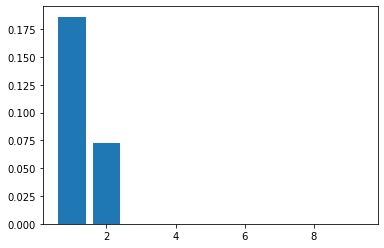

In [178]:

X1 = X_norm.loc[y==1, :]
p1 = X1.shape[0]/X_norm.shape[0]
M1 = X1.mean().values.reshape(X1.shape[1],1)
S1 = X1.cov()

X2 = X_norm.loc[y==2, :]
p2 = X2.shape[0]/X_norm.shape[0]
M2 = X2.mean().values.reshape(X2.shape[1],1)
S2 = X2.cov()

X3 = X_norm.loc[y==3, :]
p3 = X3.shape[0]/X_norm.shape[0]
M3 = X3.mean().values.reshape(X3.shape[1],1)
S3 = X3.cov()

M = p1*M1 + p2*M2 + p3*M3
Sw = p1*S1 + p2*S2 + p3*S3
Sb = p1*(M1-M)@(M1-M).T + p2*(M2-M)@(M2-M).T + p3*(M3-M)@(M3-M).T
Sm = Sb + Sw

T = np.linalg.inv(Sw)@Sb
eigval, eigvec = np.linalg.eig(T)

idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:, idx]

plt.figure()
plt.title('Sopstvene vrednosti matrice rasejanja')
plt.bar(np.arange(len(eigval))+1, eigval)
plt.show()

Na prethodnom grafiku su date sopstvene vrednosti matrice rasejanja, sortirane opadajuće. Nadalje ćemo ispitati slučaj redukcije da dva i tri obeležja.

sad na dva obelezja delimo

In [179]:
no_comp = 2
A = eigvec[:, :no_comp]

Y = A.T @ X_norm.T
Y = Y.T

data_n = pd.concat([Y, y], axis = 1)
data_n.columns = ['LDA1', 'LDA2', 'Klasa']
data_n.head()


,LDA1,LDA2,Klasa
0,0.170543+0.000000j,1.068481+0.000000j,1
1,-0.285605+0.000000j,0.630693+0.000000j,1
2,-0.127522+0.000000j,0.134960+0.000000j,1
3,-1.047181+0.000000j,0.078598+0.000000j,1
4,-0.843419+0.000000j,0.632982+0.000000j,1


c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


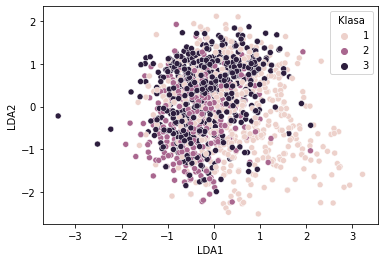

In [180]:

plt.figure()
plt.title('Grafik raspodele odbiraka po klasama u slučaju redukcije na dve dimenzije')
sns.scatterplot(data = data_n, x = 'LDA1', y = 'LDA2' , hue = 'Klasa')
plt.show()


Na prethodnom grafiku vidimo da redukcija na dve dimenzije ne daje idealnu separabilnost, što je posledica toga da ni sa originalnim skupom atributa separabilnost klasa nije dobra. Međutim, kada bismo razmislili o fizičkom značenjudobijenog rezultata, možemo da primetimo da su oni odbirci koji označavaju nekorišćenje kontraceptiva(1) u određenoj meri separabilni od onih koji oznašavaju korišćenje dugotrajne kontracepcije(2), dok se oni odbirci koji označavaju korišćenje kratkotrajnih kontraceptiva(3) mešaju sa obe druge klase. Ovo ima smisla jer se svakako odbirci (1) i (2) znatno razlikuju, dok se odbirci (3) ne mogu dovoljno odvojiti od drugih, zbog vrednosti atributa koji ukazuju na njih. Iako se u ovom slučaju delimična separabilnost može uočiti, ovaj model nije dovoljno dobar da bi mogao da se koristi za dalje projektovanje klasifikatora.

In [181]:
no_comp1 = 3
A1 = eigvec[:, :no_comp1]

Y1 = A1.T @ X_norm.T
Y1 = Y1.T
data_n1 = pd.concat([Y1, y], axis = 1)

data_n1.columns = ['LDA1', 'LDA2', 'LDA3', 'Klasa']
data_n1.head()


,LDA1,LDA2,LDA3,Klasa
0,0.170543+0.000000j,1.068481+0.000000j,0.521404-0.073808j,1
1,-0.285605+0.000000j,0.630693+0.000000j,-1.160029+1.019114j,1
2,-0.127522+0.000000j,0.134960+0.000000j,-0.732447+0.602916j,1
3,-1.047181+0.000000j,0.078598+0.000000j,-1.341348+0.490377j,1
4,-0.843419+0.000000j,0.632982+0.000000j,-1.332910+0.429834j,1


c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
c:\Users\Milica\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\co

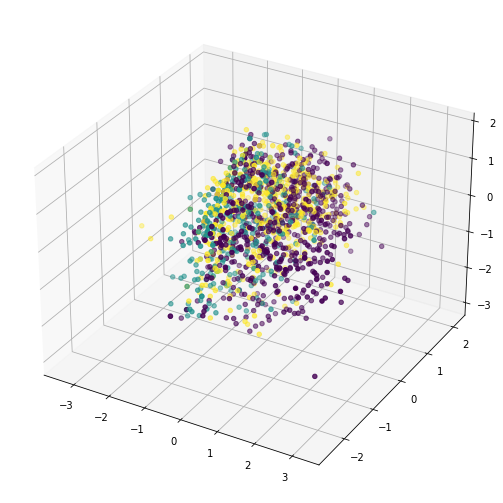

In [182]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(projection='3d')
#ax.view_init(60, 60,30)
plt.title('Grafik raspodele odbiraka po klasama u slučaju redukcije na tri dimenzije')
ax.scatter(data_n1.LDA1, data_n1.LDA2, data_n1.LDA3, c=data_n1.Klasa,)
plt.show()

VIDETI DA LI MOGU NEKAKO OSE DA SE ISPIŠU OVDE

Na prethodnom grafiku vidimo raspodelu odbiraka po klasama u slučaju redukcije na tri dimenzije. Vidimo da je u ovom slučaju separabilnost poprilično loša, a i da je dosta lošija u odnosu na slučaj redukcije na dve dimenzije. Samim tim, ni ovako generisan skup atributa neće moći da bude korišćen u daljem projktovanju.

# CETVRTA TACKA

Okej posto nam ov ne daje odgovarajucu separabilnost klasa biram obelezja na osnovu njihove informativnosti, izabracu 2 dimenzije i radim test vise hipoteza

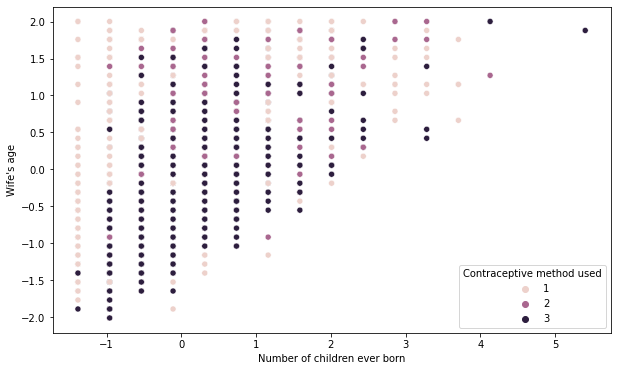

In [183]:
data_n2 = X_norm.iloc[:, [3,0]]
data_n2 = pd.concat([data_n2, y], axis = 1) # biram broj dece i godine kao najinformativnije atribute
plt.figure(figsize=(10,6))
sns.scatterplot(data = data_n2, x = 'Number of children ever born', y = "Wife's age" , hue = 'Contraceptive method used')

plt.show()
# Ovo su normlizovane vrednosti

In [184]:
def izracunaj_fgv(x, m, s):
    det = np.linalg.det(s)
    inv = np.linalg.inv(s)
    x_mu = x - m
    
    fgv_const = 1/np.sqrt(2*np.pi*det)
    fgv_rest = np.exp(-0.5*x_mu.T@inv@x_mu)
    return fgv_const*fgv_rest

In [185]:
X = data_n2.iloc[:,:-1]#tu izdvaja sva obeleyja bez klase
y = data_n2.iloc[:,-1]

from sklearn.model_selection import train_test_split
Xtrening, Xtest, Ytrening, Ytest = train_test_split(X, y, train_size=2/3, random_state=42, stratify=y)

X1 = Xtrening.loc[y==1, :]#ovde izdvaja one vrste gde je klasa 1
p1 = X1.shape[0]/Xtrening.shape[0]
M1 = X1.mean().values.reshape(X1.shape[1],1)
S1 = X1.cov()

X2 = Xtrening.loc[y==2, :]#ovde izdvaja one vrste gde je klasa 1
p2 = X2.shape[0]/Xtrening.shape[0]
M2 = X2.mean().values.reshape(X2.shape[1],1)
S2 = X2.cov()

X3 = Xtrening.loc[y==3, :]#ovde izdvaja one vrste gde je klasa 1
p3 = X3.shape[0]/Xtrening.shape[0]
M3 = X3.mean().values.reshape(X3.shape[1],1)
S3 = X3.cov()

Tacnost klasifikacije je : 51.32382892057027%.


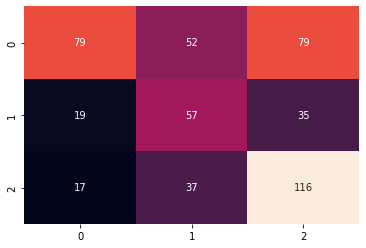

In [186]:
Ntest = Xtest.shape[0]
odluka = np.zeros(Ntest)
for i in range(Ntest):
    
    X = np.array(Xtest.iloc[i,:]).reshape((2, 1))
    
    f1 = izracunaj_fgv(X, M1, S1)
    f2 = izracunaj_fgv(X, M2, S2)
    f3 = izracunaj_fgv(X, M3, S2)  
   
    f = np.array([f1, f2, f3])

    ind = np.argmax(f)
    
    
    if ind == 0:
        odluka[i] = 1  
    elif ind == 1:
        odluka[i] = 2
    else:
        odluka[i] = 3



from sklearn.metrics import accuracy_score
acc = accuracy_score(Ytest, odluka)
print('Tacnost klasifikacije je : ' + str(acc*100) + '%.')

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Ytest, odluka)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

sad mora neki grafik nisam sigurna , ispitala sam tacnost i kad stavimp 3 dimenzije i kad ostavimo 2dm lda metodom, ne dobija se nista bolje.


In [187]:


data_test = pd.concat([Xtest, Ytest], axis = 1)

odluka_df = pd.DataFrame({'Klasa':odluka})
Xtest = Xtest.reset_index()
data_prediction = pd.concat([Xtest, odluka_df], axis = 1)
#ne pitaj kolko je tesko spojiti samo niz i pandas moras ga konvertovati u pande pa tek onda spojiti


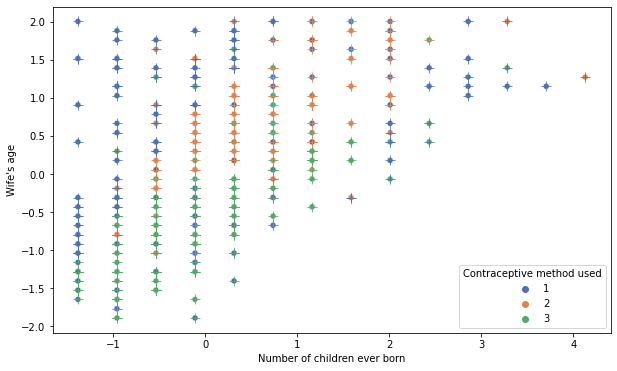

In [188]:
# da li treba da vratim iz normalizovanih vrednosti ali to mi sad kompliovano jer su ovo Xtest promesane vrednosti
plt.figure(figsize=(10,6))
sns.scatterplot(data = data_test, x = "Number of children ever born", y = "Wife's age", hue = "Contraceptive method used", palette = "deep")
sns.scatterplot(data = data_prediction, x = "Number of children ever born", y = "Wife's age", hue = "Klasa", marker = "+",s = 100, legend = False, palette = "deep")
plt.show()


CETVRTA TACKA-SA 3 OBELEZJA


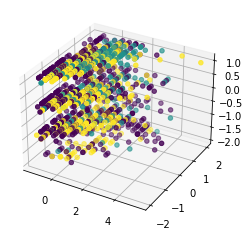

In [189]:
data_n3 = X_norm.iloc[:, [3,0,1]]
data_n3 = pd.concat([data_n3, y], axis = 1) # biram broj dece, godine i obrazovanje zene kao najinformativnije atribute
data_n3.columns = ['Children', 'Age', 'Education', 'Contraceptive method']
#OVO SAM PROMENILA JER JE PRE BIO JEDANAPOSTROF I TO JE DOLE U SL FUNKCIJI POSMATRALO KAO POCETAK STRINGA

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_n3["Children"], data_n3["Age"], data_n3["Education"], c=data_n3["Contraceptive method"])
plt.show()

In [190]:
def izracunaj_fgv(x, m, s):
    det = np.linalg.det(s)
    inv = np.linalg.inv(s)
    x_mu = x - m
    
    fgv_const = 1/np.sqrt(2*np.pi*det)
    fgv_rest = np.exp(-0.5*x_mu.T@inv@x_mu)
    return fgv_const*fgv_rest

In [191]:
X = data_n3.iloc[:,:-1]#tu izdvaja sva obeleyja bez klase
y = data_n3.iloc[:,-1]


from sklearn.model_selection import train_test_split
Xtrening, Xtest, Ytrening, Ytest = train_test_split(X, y, train_size=2/3, random_state=42, stratify=y)

X1 = Xtrening.loc[y==1, :]#ovde izdvaja one vrste gde je klasa 1
p1 = X1.shape[0]/Xtrening.shape[0]
M1 = X1.mean().values.reshape(X1.shape[1],1)
S1 = X1.cov()

X2 = Xtrening.loc[y==2, :]#ovde izdvaja one vrste gde je klasa 1
p2 = X2.shape[0]/Xtrening.shape[0]
M2 = X2.mean().values.reshape(X2.shape[1],1)
S2 = X2.cov()

X3 = Xtrening.loc[y==3, :]#ovde izdvaja one vrste gde je klasa 1
p3 = X3.shape[0]/Xtrening.shape[0]
M3 = X3.mean().values.reshape(X3.shape[1],1)
S3 = X3.cov()

Tacnost klasifikacije je : 52.74949083503056%.


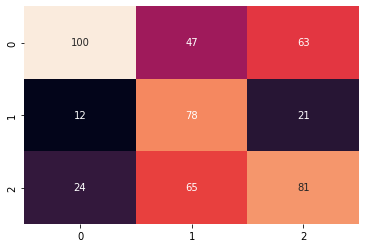

In [192]:
Ntest = Xtest.shape[0]
odluka = np.zeros(Ntest)
for i in range(Ntest):
    
    X = np.array(Xtest.iloc[i,:]).reshape((3, 1))
    
    f1 = izracunaj_fgv(X, M1, S1)
    f2 = izracunaj_fgv(X, M2, S2)
    f3 = izracunaj_fgv(X, M3, S2)  
   
    f = np.array([f1, f2, f3])

    ind = np.argmax(f)
    
    
    if ind == 0:
        odluka[i] = 1  
    elif ind == 1:
        odluka[i] = 2
    else:
        odluka[i] = 3



from sklearn.metrics import accuracy_score
acc = accuracy_score(Ytest, odluka)
print('Tacnost klasifikacije je : ' + str(acc*100) + '%.')

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Ytest, odluka)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

In [193]:
# data_test = pd.concat([Xtest, Ytest], axis = 1)

# odluka_df = pd.DataFrame({'Klasa':odluka})
# Xtest = Xtest.reset_index()
# data_prediction = pd.concat([Xtest, odluka_df], axis = 1)


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_test.Children, data_test.Age, data_test.Education, c=data_test["Contraceptive method"])
# ax.scatter(data_prediction.Children, data_prediction.Age, data_test.Education, c=data_prediction["Contraceptive method"], marker = "+", s = 100, legend = False, pallete = "deep")
# plt.show()

### Peta tačka
U narednom delu zadatka je potrebno da se primeni jedna od metoda neparametarske klasifikacije, u zavisnosti od separabilnosti klasa. Kako bi se primenila KNN metoda, potrebno je da klase budu separabilno, što smo ranije pokazali da u našem primeru nije slučaj. Iz tog razloga biće primenjena metoda stabla odlučivanja. Stablo odlučivanja funkcioniše tako što se u svakom čvoru bira najinformativnije obeležje. Nakon toga se bira prag najveće tacnosti i na osnovu tog praga se vrši podela podataka. Nakon toga se prelazi na sledeći nivo, gde se postupak ponavlja. Ponavljanje se vrši do zadate dubine ili dok se ne do dođe do poslednjeg obeležja.  
Na početku je dat jedan primer stabla odlučivanja sa dubinom 3. I dalje je nepoznata optimalna dubina stabla, pa je u ovom slučaju uzeta proizvoljna brzina, kako bi se dao pokazni primer.

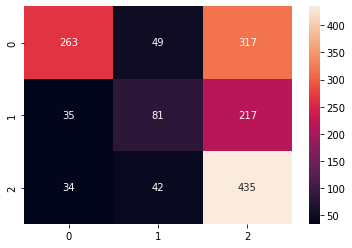

Tačnost stabla odlučivanja iznosi: 52.885268160217244%.


In [194]:
from sklearn import tree
from sklearn.metrics import accuracy_score

classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier = classifier.fit(X_norm, y) 
y_pred = classifier.predict(X_norm)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
plt.figure()
plt.title('Konfuziona matrica')
sns.heatmap(conf_mat, annot = True, fmt = 'g', cbar = 'False')
plt.show()

print('Tačnost stabla odlučivanja iznosi: ' + str(accuracy_score(y, y_pred)*100) + '%.')

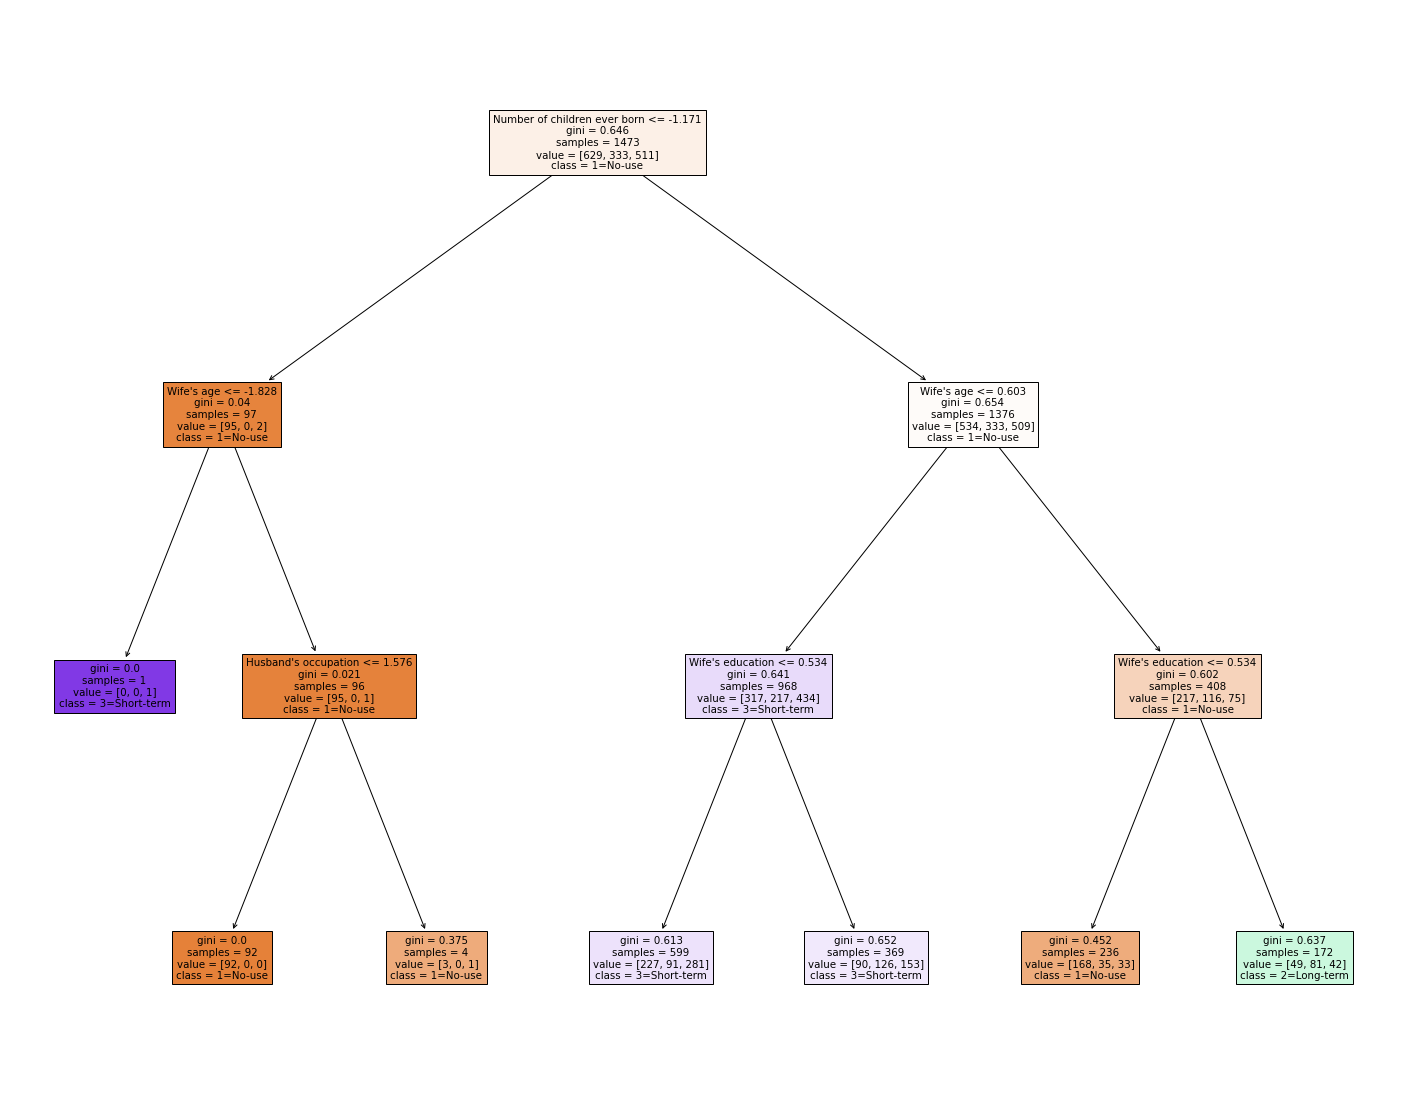

In [195]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, feature_names = X_norm.columns, 
                   class_names = ['1=No-use', '2=Long-term', '3=Short-term'], filled = True)


Na prethodnom grafiku možemo videti šematski prikaz stabla odlučivanja pokaznog primera. Na dalje je potrebno naći optimalnu dubinu stabla. Za to se koristi Grid Search koji u svojim proračunima za validaciju koristi metodu krosvalidacije. Naime ta metoda funkcioniše tako što se odbirci podele na $k$ delova i vrši se pravljenje estimatora $k$, gde se u svakom slučaju različita od tih $k$ podsekvenci uzima sa testiranje, dok se ostalih $k-1$ koriste za treniranje klasifikatora. Za svaki od tih klasifikatora se nađe greška, i svih $k$ grešaka se nakraju usrednji. Grid Search pronalazi parametre koji daju najbolji estimator.  
U zadatku je traženo da se pronađe optimalna dubina stabla, međutim u ovom slučaju je testirana i najbolji kriterijum po kome se biraju čvorovi. Ovaj proračun je dat sledećim kodom:

Najbolji kriterijum: gini
Optimalna dubina stabla: 5


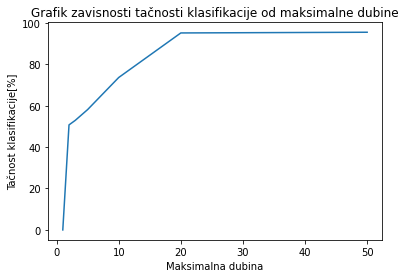

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


max_depth = [1, 2, 3, 5, 10, 20, 50]

tree_param = {'criterion':['gini', 'entropy'], 'max_depth':[1, 2, 3, 5, 10, 20, 50]}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state = 42), tree_param, cv = 5)
clf.fit(X_norm, y)

print('Najbolji kriterijum:', clf.best_estimator_.get_params()['criterion'])
print('Optimalna dubina stabla:', clf.best_estimator_.get_params()['max_depth'])



acc = np.zeros(len(max_depth))
for i in range(1,len(max_depth)):
    classifier = tree.DecisionTreeClassifier(criterion = clf.best_estimator_.get_params()['criterion'], max_depth = max_depth[i])
    classifier = classifier.fit(X_norm, y) 
    y_pred_acc = classifier.predict(X_norm)
    acc[i] = accuracy_score(y, y_pred_acc)*100


plt.figure()
plt.plot(max_depth, acc)
plt.xlabel('Maksimalna dubina')
plt.ylabel('Tačnost klasifikacije[%]')
plt.title('Grafik zavisnosti tačnosti klasifikacije od maksimalne dubine')
plt.show()


Prethodni kod je dao rezultat da je najbolji kriterijum za izbor čvorova kriterijum 'gini', dok je optimalna dubina stabla 5. Međutim, iznad je i prikazan grafik zavisnosti tačnosti klasifikacije od maksimalne dubine stabla, i na njemu vidimo da je nakon dubine 20 tačnost klasifikacije gotovo 100%, a uprkos tome Grid Search nam daje dosta manji rezultat za optimalnu dubinu. Razlog tome je što Grid Search deli odbirke na trenirajući i testirajući skup, dok je za potrebe pravljenja poslednjeg grafika, i za treniranje i za testiranje korišćen isti skup, pa je došlo do preobučavanja klasifikatora, što znači da se on savršeno obučio za dati trening skup, pošto se isti koristi i za testiranje, pak kada bi mu se doveo novi test skup, rezultati bi bili veoma loši. Pored toga, bitno je povesti računa i o tome da dubina ne bude prevelika. Uzevši sve to u obzir, za konačan klasifikator biće korišćena dubina 5.

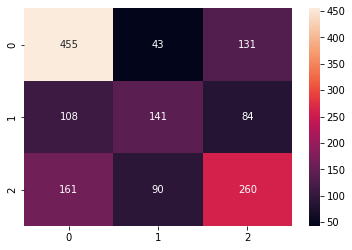

Tačnost stabla odlučivanja iznosi: 58.11269517990496%.


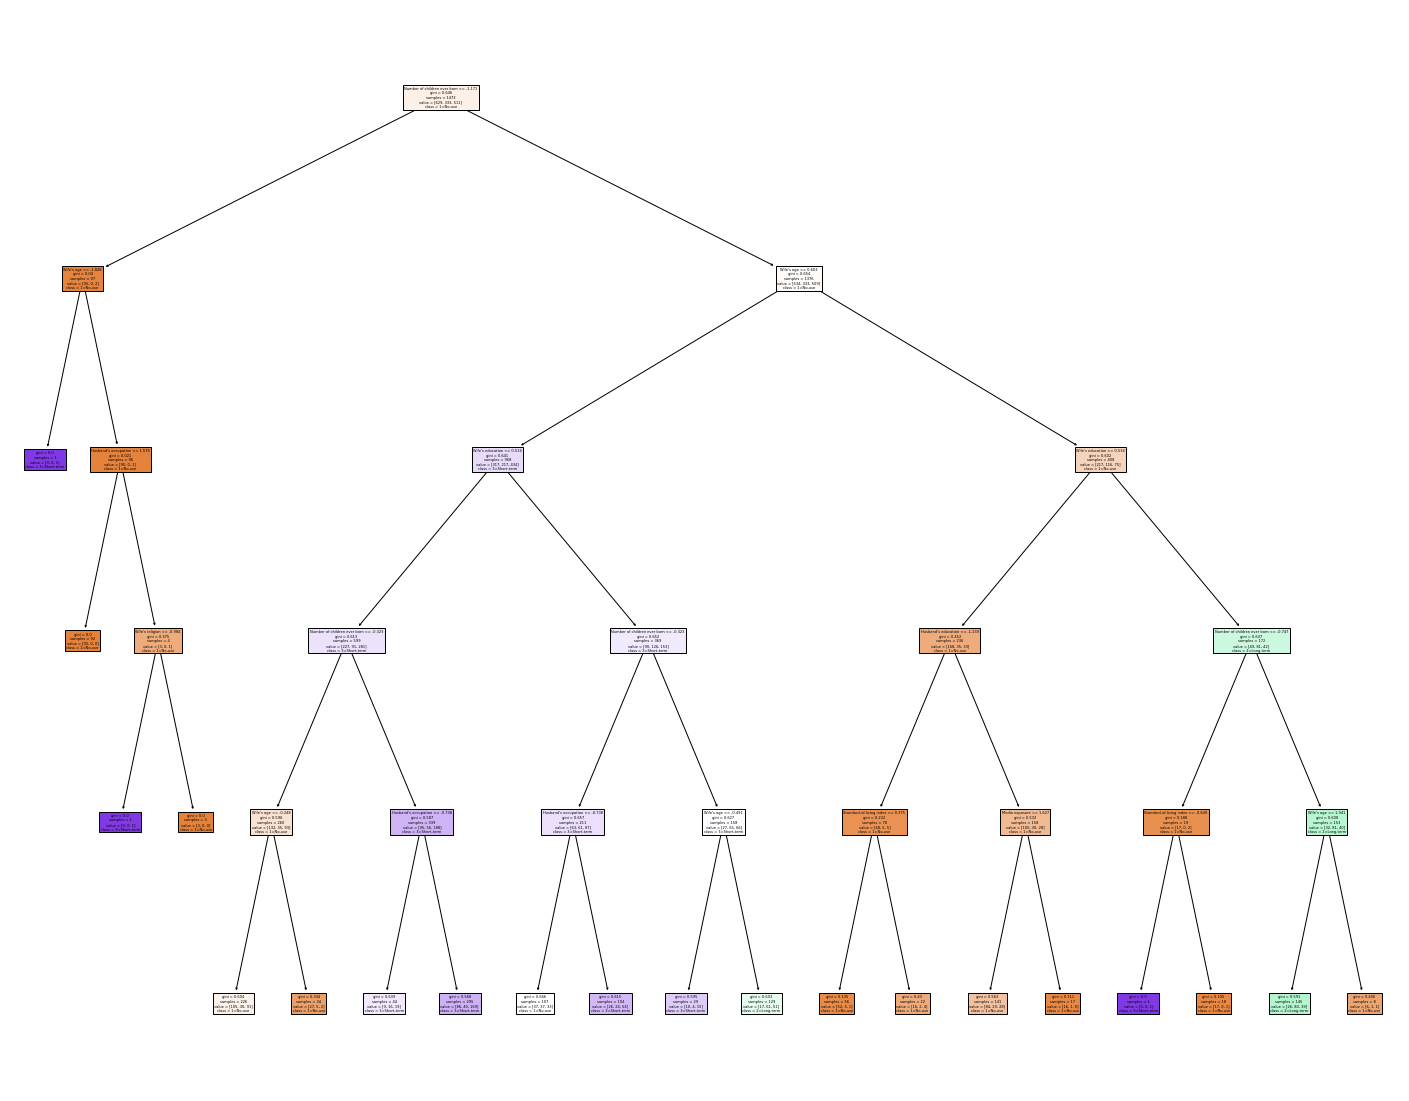

In [197]:
classifier = tree.DecisionTreeClassifier(criterion = clf.best_estimator_.get_params()['criterion'], max_depth = clf.best_estimator_.get_params()['max_depth'])
classifier = classifier.fit(X_norm, y)
y_pred = classifier.predict(X_norm)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
plt.figure()
plt.title('Konfuziona matrica')
sns.heatmap(conf_mat, annot = True, fmt = 'g', cbar = 'False')
plt.show()

print('Tačnost stabla odlučivanja iznosi: ' + str(accuracy_score(y, y_pred)*100) + '%.')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, feature_names = X_norm.columns, 
                   class_names = ['1=No-use', '2=Long-term', '3=Short-term'], filled = True)


Iznad je dato konačno stablo odlučivanja, kao i njegova konfuziona matrica i tačnost. Vidimo da tačnost od 58.13% nije idealna, a zaključak je da je razlog tome sama priroda atributa koji više ukazuju na sociološke pojave, nego na uzročno-posledične veze, što dovofi do toga da ne može da se napravi klasifikator dovoljno dobre tačnosti.

# SESTA TACKA


In [198]:
X = data.iloc[:,:-1]#tu izdvaja sva obeleyja bez klase
D = data.iloc[:,-1]#ovde samo klasu

from sklearn.model_selection import train_test_split
Xtrening, Xtest, Dtrening, Dtest = train_test_split(X, D, test_size=0.2, shuffle=True, random_state=20)

from tensorflow.keras.utils import to_categorical
Dtrening_cat = to_categorical(Dtrening)
Dtest_cat = to_categorical(Dtest)


PRVO RADIMO JEDAN SKRIVENI SLOJ 9 NEURONA


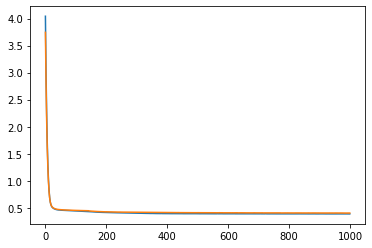

Tačnost na trening skupu iznosi: 57.72495755517827%.
Tačnost na test skupu iznosi: 53.898305084745765%.


In [199]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(9,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')


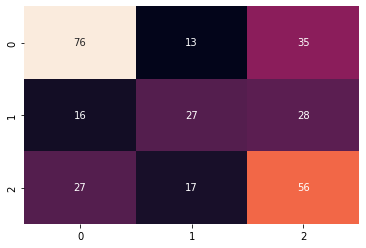

In [200]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Dtest, YpredTest)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

JEDAN SKRIVENI 20 NEURONA

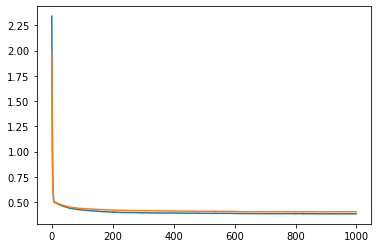

Tačnost na trening skupu iznosi: 58.149405772495754%.
Tačnost na test skupu iznosi: 54.23728813559322%.


In [201]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(20,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')

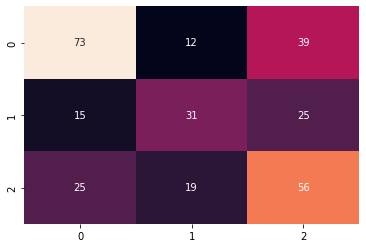

In [202]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Dtest, YpredTest)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

AJ SAD STAVIM 200 IZ GASA / OVDE VIDIMO DA SE NE POPRAVLJA PUNO TACNOST SA POVECAVANJEM BROJA NEURONA STOGA IDEMO NA SLOJEVE

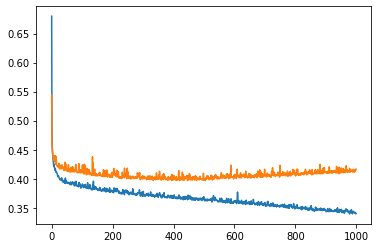

Tačnost na trening skupu iznosi: 64.26146010186757%.
Tačnost na test skupu iznosi: 53.898305084745765%.


In [203]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(200,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')

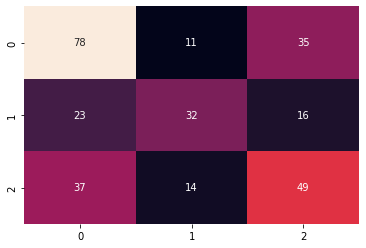

In [204]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Dtest, YpredTest)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

DVA SLOJA SA vecim BROJEM NEURONA

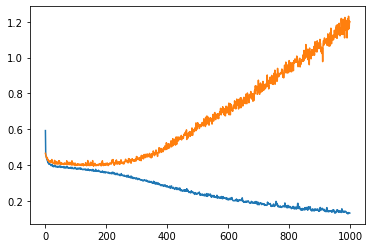

Tačnost na trening skupu iznosi: 90.2376910016978%.
Tačnost na test skupu iznosi: 48.8135593220339%.


In [210]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(200,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(100, activation='relu')) 
model.add(Dense(50, activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')

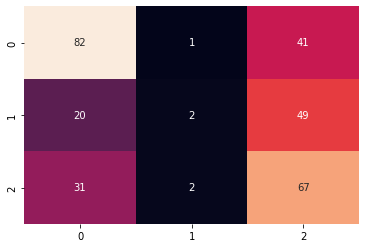

In [206]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Dtest, YpredTest)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

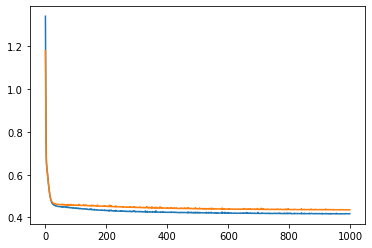

Tačnost na trening skupu iznosi: 52.12224108658744%.
Tačnost na test skupu iznosi: 49.49152542372882%.


In [211]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(5,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(5, activation='relu')) 
model.add(Dense(5, activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')

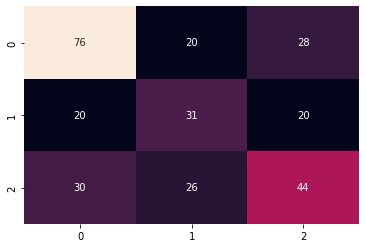

In [208]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Dtest, YpredTest)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

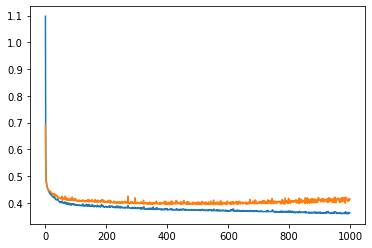

Tačnost na trening skupu iznosi: 61.460101867572156%.
Tačnost na test skupu iznosi: 55.254237288135585%.


In [223]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(20, activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

#es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)


history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')

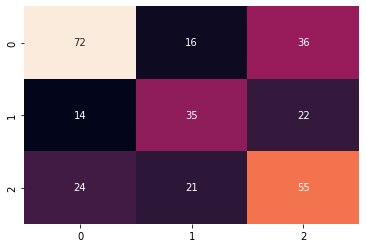

In [226]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Dtest, YpredTest)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

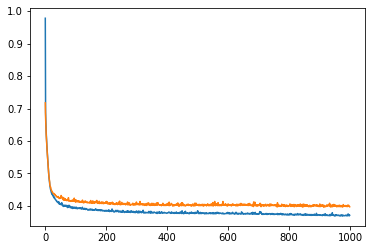

Tačnost na trening skupu iznosi: 59.16808149405772%.
Tačnost na test skupu iznosi: 54.91525423728814%.


In [225]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30,input_dim=np.shape(Xtrening)[1], activation='relu'))
model.add(Dense(20, activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)


history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')

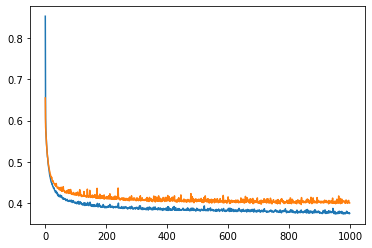

Tačnost na trening skupu iznosi: 60.69609507640068%.
Tačnost na test skupu iznosi: 55.254237288135585%.


In [230]:


from keras.regularizers import l2
from keras.layers import Dense
model = Sequential()
model.add(Dense(30,input_dim=np.shape(Xtrening)[1], activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(20, activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(np.shape(Dtrening_cat)[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(Xtrening, Dtrening_cat, 
                    epochs=1000,
                    batch_size=64, 
                    validation_data=(Xtest, Dtest_cat), 
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

YpredTrening = model.predict(Xtrening, verbose=0)
YpredTrening = np.argmax(YpredTrening, axis=1)

YpredTest = model.predict(Xtest, verbose=0)
YpredTest = np.argmax(YpredTest, axis=1)

from sklearn.metrics import accuracy_score
Atrening = accuracy_score(Dtrening, YpredTrening)
print('Tačnost na trening skupu iznosi: ' + str(Atrening*100) + '%.')

Atest = accuracy_score(Dtest, YpredTest)
print('Tačnost na test skupu iznosi: ' + str(Atest*100) + '%.')